### Bootstrap

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [10]:
data = pd.read_csv("michelson_speed_of_light.csv")

In [13]:
michelson_speed_of_light = data["velocity of light in air (km/s)"]

In [14]:
np.random.choice([1,2,3,4,5], size=5)


array([3, 4, 3, 2, 5])

In [15]:
bs_sample = np.random.choice(michelson_speed_of_light, size=100)

In [16]:
np.mean(bs_sample)

299849.1

In [17]:
np.median(bs_sample)

299840.0

In [18]:
np.std(bs_sample)

69.48517827565819

In [19]:
def bootstrap_replicate_1d(data, func):
    """Generate bootstrap replicate of 1D data."""
    bs_sample = np.random.choice(data, len(data))
    return func(bs_sample)

In [20]:
bootstrap_replicate_1d(michelson_speed_of_light, np.mean)

299847.7

In [21]:
bootstrap_replicate_1d(michelson_speed_of_light, np.mean)

299847.6

In [22]:
bootstrap_replicate_1d(michelson_speed_of_light, np.mean)

299854.4

In [24]:
bs_replicates = np.empty(10000)

for i in range(10000):
    bs_replicates[i] = bootstrap_replicate_1d(michelson_speed_of_light, 
                                              np.mean)

/usr/local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


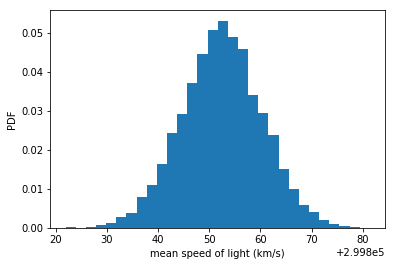

In [27]:
_ = plt.hist(bs_replicates, bins=30, normed=True)
_ = plt.xlabel('mean speed of light (km/s)')
_ = plt.ylabel('PDF')
plt.show()

In [30]:
conf_int = np.percentile(bs_replicates, [2.5, 97.5])
conf_int

array([299837. , 299867.8])

#### Pairs bootstrap

In [7]:
female_literacy_fertility = pd.read_csv("female_literacy_fertility.csv")

illiteracy = 100 - female_literacy_fertility["female literacy"]
fertility = female_literacy_fertility["fertility"]

In [8]:
def draw_bs_pairs_linreg(x, y, size=1):
    """Perform pairs bootstrap for linear regression."""

    # Set up array of indices to sample from: inds
    inds = np.arange(len(x))

    # Initialize replicates: bs_slope_reps, bs_intercept_reps
    bs_slope_reps = np.empty(size)
    bs_intercept_reps = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_inds = np.random.choice(inds, size=len(inds))
        bs_x, bs_y = x[bs_inds], y[bs_inds]
        bs_slope_reps[i], bs_intercept_reps[i] = np.polyfit(bs_x, bs_y, 1)

    return bs_slope_reps, bs_intercept_reps

[0.04419546 0.05576457]


/usr/local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


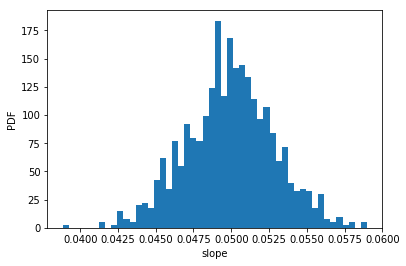

In [9]:
# Generate replicates of slope and intercept using pairs bootstrap
bs_slope_reps, bs_intercept_reps = draw_bs_pairs_linreg(
                    illiteracy, fertility, size=1000)

# Compute and print 95% CI for slope
print(np.percentile(bs_slope_reps, [2.5, 97.5]))

# Plot the histogram
_ = plt.hist(bs_slope_reps, bins=50, normed=True)
_ = plt.xlabel('slope')
_ = plt.ylabel('PDF')
plt.show()

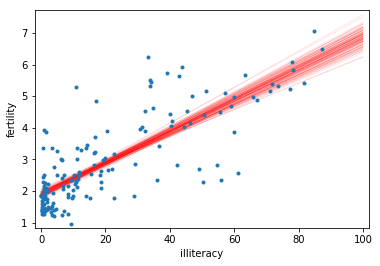

In [10]:
# Generate array of x-values for bootstrap lines: x
x = np.array([0, 100])

# Plot the bootstrap lines
for i in range(100):
    _ = plt.plot(x, bs_slope_reps[i] * x + bs_intercept_reps[i],
                 linewidth=0.5, alpha=0.2, color='red')

# Plot the data
_ = plt.plot(illiteracy, fertility, marker='.', linestyle='none')

# Label axes, set the margins, and show the plot
_ = plt.xlabel('illiteracy')
_ = plt.ylabel('fertility')
plt.margins(0.02)
plt.show()

### Optimization 

#### Newton-Raphson 

In [11]:
import numpy as np
from  numpy import linalg as la
import scipy as sci
import matplotlib.pyplot as plt

In [12]:
x = np.arange(-5,5, 0.1);
def f(x):
    return (x**3-2*x+7)/(x**4+2)

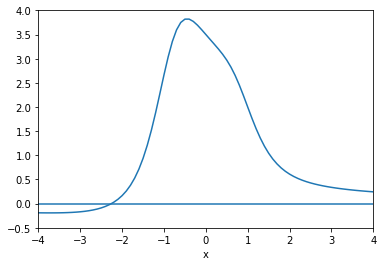

In [13]:
y = f(x)

p1=plt.plot(x, y)
plt.xlim(-4, 4)
plt.ylim(-.5, 4)
plt.xlabel('x')
plt.axhline(0)

In [14]:
def fprime(x):
    return (x**4 + 2)**(-2)*((3*x**2-2)*(x**4+2) - 4*x**3*(x**3-2*x+7))

In [15]:
def NR(x0,tol,f,fprime):
    xval= x0
    xstore = np.empty(1)
    xstore[0]=xval
    notconverge = 1
    its = 1
    
    while notconverge == 1:
        nextvalue = xval - f(xval)/fprime(xval)
        #error = abs(nextvalue-xval)
        error = f(nextvalue)
        
        if error > tol:
            notconverge = 1
            its = its +1
            xval = nextvalue
            xstore = np.append(xstore,nextvalue)
        else:
            notconverge = 0
    return ({'estimate':xval, 'number of iterations':its, 'sequence of estimates':xstore})

In [42]:
NR(-1, 0.0001, f, fprime)

{'estimate': -2.2546433717066834,
 'number of iterations': 5,
 'sequence of estimates': array([-1.        , -1.68571429, -2.01135095, -2.2005717 , -2.25464337])}

In [43]:
from scipy import optimize
scipy_result = sci.optimize.newton(f, x0=-1, fprime=fprime)

In [44]:
scipy_result

-2.2582588834026085

#### EM Algorithm

[-1.   1.   0.5]
[-0.07743775  2.54038454  0.16988834]
[-0.00723754  2.9968833   0.3       ]


/usr/local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:75: MatplotlibDeprecationWarning: scipy.stats.norm.pdf
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:76: MatplotlibDeprecationWarning: scipy.stats.norm.pdf


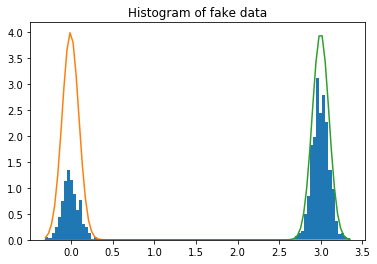

In [48]:
import numpy as np
from numpy import random
from scipy.optimize import minimize, show_options
import matplotlib.pyplot as plt
import math
import matplotlib.mlab as mlab

def gaussian(x, mean, dev=0.1):
    # standard deviation, square root of variance
    return 1/math.sqrt(2*math.pi)/dev*math.exp(-(x-mean)**2/2/dev**2)

# Generating data
N=1000
a=0.3
sample1=random.normal(0, 0.1, size=int(N*a))
sample2=random.normal(3, 0.1, size=int(N*(1-a)))
sample=np.concatenate([sample1,sample2])

hist, bin_edges = np.histogram(sample, bins=100)
# plt.plot(hist)
# plt.title('Histogram of fake data')
# plt.show()

# Learning parameters
max_iter = 50

# Initial guess of parameters and initializations
params = np.array([-1,1,0.5])

# EM loop
counter = 0
converged = False

plabel1=np.zeros(sample.shape)
plabel2=np.zeros(sample.shape)

counter=0
criterion=0.1
converged=False

while not converged and counter<100:
    counter+=1
    mu1, mu2, pi_1 = params

    # Expectation
    # Find the probabilty of labeling data points
    for i in range(len(sample)):
        cdf1=gaussian(sample[i], mu1)
        cdf2=gaussian(sample[i], mu2)

        pi_2=1-pi_1

        plabel1[i]=cdf1*pi_1/(cdf1*pi_1+cdf2*pi_2)
        plabel2[i]=cdf2*pi_2/(cdf1*pi_1+cdf2*pi_2)

    # Maximization
    # From the labeled data points, 
    # find mean through averaging (aka ML)
    mu1=sum(sample*plabel1)/sum(plabel1)
    mu2=sum(sample*plabel2)/sum(plabel2)
    pi_1=sum(plabel1)/len(sample)
    newparams=np.array([mu1, mu2, pi_1])
    print(params)

    # Convergence check
    if np.max(abs(np.asarray(params)-np.asarray(newparams)))<criterion:
        converged=True

    params=newparams

plt.title('Histogram of fake data')
plt.hist(sample,bins=100, normed=True)

x=np.linspace(sample.min(), sample.max(), 100)
plt.plot(x, mlab.normpdf(x,mu1, 0.1))
plt.plot(x, mlab.normpdf(x,mu2, 0.1))

plt.show()